In [1]:
from google.colab import drive

drive.mount("/content/MyDrive")

Mounted at /content/MyDrive


In [2]:
# Merge two dataset (food_data1 & food_data2)
# Convert object type to date_time in the first dataset


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from scipy.stats import chi2_contingency
from scipy import stats
import datetime
import matplotlib.ticker as mtick

food_data1 = pd.read_csv("/content/MyDrive/MyDrive/food_data1.csv")

food_data2 = pd.read_excel("/content/MyDrive/MyDrive/food_data2.xlsx")

food_data1['Dt_Customer'] = pd.to_datetime(food_data1['Dt_Customer'])

df = food_data1.merge(food_data2, how = 'outer')

# There were two different datasets for a food company. They were merged.
# The data includes customer information (their birth year, income,
# kids and teenagers at home, education level, enrollment date to the company
# as a customer,), their amount spent for the different products in the
# last two years, number of days since their last purchase,
# if they complain in the last two years, their answer to the different campaigns
# and to the last campaign. In addition, the customer enrollment data was
# converted to datetime to analyze the data easier.


In [3]:
# Rename few columns to make the data more understandable.
# Show the name and the type of the columns

df = df.rename(columns={"Year_Birth": "Birth_Year", "Income" : "Yearly_Income", "Kidhome": "Kid_at_Home", "Teenhome": "Teen_at_Home",
                        "Dt_Customer" : "Customer_Enrollment_Date","Recency" : "Days_Since_Last_Purchase",
                        "MntWines": "Spent_for_Wines", "MntFruits" : "Spent_for_Fruits", "MntMeatProducts" : "Spent_for_Meat",
                        "MntFishProducts" : "Spent_for_Fish", "MntSweetProducts" : "Spent_for_Sweet",
                        "MntGoldProds" : "Spent_for_Gold", "Complain": "Complaint_Last_Two_Years"})

df.dtypes

# Some of the columns were renamed to make them more understable for the readers.

ID                                   int64
Birth_Year                           int64
Education                           object
Marital_Status                      object
Yearly_Income                      float64
Kid_at_Home                          int64
Teen_at_Home                         int64
Customer_Enrollment_Date    datetime64[ns]
Days_Since_Last_Purchase             int64
Spent_for_Wines                      int64
Spent_for_Fruits                     int64
Spent_for_Meat                       int64
Spent_for_Fish                       int64
Spent_for_Sweet                      int64
Spent_for_Gold                       int64
NumDealsPurchases                    int64
NumWebPurchases                      int64
NumCatalogPurchases                  int64
NumStorePurchases                    int64
NumWebVisitsMonth                    int64
AcceptedCmp3                         int64
AcceptedCmp4                         int64
AcceptedCmp5                         int64
AcceptedCmp

In [4]:
# Delete any space in colunms name (Income has space)

df.columns = df.columns.str.replace(' ', '')

# The name of " Income" columns had space in the beginning, therefore
# the space was deleted as part of data cleaning.

In [5]:
# Get the age of the customer from their year of birth

current_year = df.Customer_Enrollment_Date.max().year

df['Age'] = current_year - df['Birth_Year']

# Age column was created from customers' year of birth in order to
# use the infomation as part of descriptive and explorative data analysis.

In [6]:
# Get the tenurity of the customer from their year of enrollment

current_date = pd.to_datetime(df['Customer_Enrollment_Date']).max()

df['Customer_Tenure_In_Days'] = (current_date - pd.to_datetime(df['Customer_Enrollment_Date'])).dt.days


# Customer tenurity was calculated from enrollment year and a column was created
# to use the infomation as part of descriptive and explorative data analysis.

In [7]:
# Get the total acceptance rate of the campaigns

campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
                    'AcceptedCmp4', 'AcceptedCmp5', 'Response']

df['Total_Acceptance'] = df[campaign_columns].sum(axis=1)

# Total acceptance rate of the campaigns was calculated an a column was created
# in order to use the infomation as part of descriptive and explorative data analysis.


In [8]:
# Add to data an index column

column_index = range(0,2240)

df['Index'] = column_index[:len(df)]

df = df[['Index'] + [col for col in df.columns if col != 'Index']]

df.shape

# An index column for customers was created in order to make the data more structured.

(2240, 31)

In [9]:
# Identify and drop outliers in the Age column

df = df.drop(df[df['Birth_Year'] < 1900].index)

df.shape

# Outliers in the age column was identified and dropped as part of data
# cleaning in order to get more reliable results

(2238, 31)

In [10]:
# Identify number of null rows for each column


df.isnull().sum().sort_values(ascending=False)

# Number of null rows for each column were identified
# to handle null data.

Yearly_Income               24
Index                        0
NumDealsPurchases            0
Customer_Tenure_In_Days      0
Age                          0
Response                     0
Complaint_Last_Two_Years     0
AcceptedCmp2                 0
AcceptedCmp1                 0
AcceptedCmp5                 0
AcceptedCmp4                 0
AcceptedCmp3                 0
NumWebVisitsMonth            0
NumStorePurchases            0
NumCatalogPurchases          0
NumWebPurchases              0
Spent_for_Gold               0
ID                           0
Spent_for_Sweet              0
Spent_for_Fish               0
Spent_for_Meat               0
Spent_for_Fruits             0
Spent_for_Wines              0
Days_Since_Last_Purchase     0
Customer_Enrollment_Date     0
Teen_at_Home                 0
Kid_at_Home                  0
Marital_Status               0
Education                    0
Birth_Year                   0
Total_Acceptance             0
dtype: int64

In [11]:
# Drop rows containing null data

df = df.dropna()

# The null rows were dropped from the data
# to get more reliable results in the desciptive and
# explorative analysis.

In [12]:
# Drop duplicated rows if there are

df = df.drop_duplicates()

# The duplicated rows were dropped from the data
# to get more reliable results in the desciptive and
# explorative analysis.


In [13]:
# Normalize Yearly Income by using Z-score

df['z_score'] = (df.Yearly_Income - df.Yearly_Income.mean()) / df.Yearly_Income.std()

df_no_outliers =df[np.abs(df['z_score']) <= 3]
df_no_outliers = df_no_outliers.drop(columns=['z_score'])
df = df_no_outliers

# Yearly income was normalized with Z-Score and drop the outliers
# to get more reliable results in the desciptive and
# explorative analysis.

In [14]:
# Create Income Interval Column

income_column = []

for row in df.Yearly_Income:
  if 0 < row <= 10000:
    income_column.append("0-10000")
  elif 10000 <= row < 20000:
    income_column.append("10000-20000")
  elif 20000 <= row < 30000:
    income_column.append("20000-30000")
  elif 30000 <= row < 40000:
    income_column.append("30000-40000")
  elif 40000 <= row < 50000:
    income_column.append("40000-50000")
  elif 50000 <= row < 60000:
    income_column.append("50000 60000")
  elif 60000 <= row < 70000:
    income_column.append("60000-70000")
  elif 70000 <= row < 80000:
    income_column.append("70000-80000")
  elif 80000 <= row < 90000:
    income_column.append("80000-90000")
  elif 90000 <= row < 100000:
    income_column.append("90000-100000")
  else:
    income_column.append("More than 100000")

income_column.sort()

df['Income_Intervals'] = income_column

# Income Interval Column for customers were created to make the analyses easier.

In [15]:
# Identify the number of rows and columns

df.shape

# The number of rows and columns were identified as part of
# descriptive analysis.Now there is 2206 rows and 32 columns
# in the data.


(2206, 32)

In [16]:
# Identify columns - updated version

df.columns

# The columns were identified as part of
# descrpitive analysis.

Index(['Index', 'ID', 'Birth_Year', 'Education', 'Marital_Status',
       'Yearly_Income', 'Kid_at_Home', 'Teen_at_Home',
       'Customer_Enrollment_Date', 'Days_Since_Last_Purchase',
       'Spent_for_Wines', 'Spent_for_Fruits', 'Spent_for_Meat',
       'Spent_for_Fish', 'Spent_for_Sweet', 'Spent_for_Gold',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complaint_Last_Two_Years', 'Response', 'Age',
       'Customer_Tenure_In_Days', 'Total_Acceptance', 'Income_Intervals'],
      dtype='object')

In [17]:
# Get important statistics from the data

df.describe()

# The statisctics of columns (count, mean, min number, max number, %25, %50, %75,
# standard deviation) were gathered as part of descrptive analysis.


,Index,ID,Birth_Year,Yearly_Income,Kid_at_Home,Teen_at_Home,Customer_Enrollment_Date,Days_Since_Last_Purchase,Spent_for_Wines,Spent_for_Fruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complaint_Last_Two_Years,Response,Age,Customer_Tenure_In_Days,Total_Acceptance
count,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206,2206.000000,2206.000000,2206.000000,...,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000,2206.000000
mean,1122.411151,5586.456482,1968.873073,51615.303264,0.442430,0.506346,2013-07-10 07:36:16.971894784,49.031732,306.032638,26.393926,...,0.073889,0.074343,0.072983,0.064370,0.013599,0.009519,0.150952,45.126927,353.683137,0.450136
min,0.000000,0.000000,1900.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000
25%,567.250000,2817.750000,1959.000000,35196.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,24.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000,180.000000,0.000000
50%,1121.500000,5458.500000,1970.000000,51277.000000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,177.500000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,355.500000,0.000000
75%,1678.750000,8417.500000,1977.000000,68279.250000,1.000000,1.000000,2013-12-31 00:00:00,74.000000,506.500000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,529.000000,1.000000
max,2239.000000,11191.000000,1996.000000,113734.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,699.000000,5.000000
std,642.668729,3247.161301,11.794738,20710.823073,0.537141,0.544363,NaN,28.945126,337.474244,39.777834,...,0.261650,0.262387,0.260167,0.245466,0.115847,0.097124,0.358083,11.794738,202.524468,0.893924


In [18]:
# Get the name of the columns, total non-null values in these columns and the type of the columns

df.info()

# The name of the columns, total non-null values in these columns and the type of the columns were
# gathered as part of descriptive analysis. Now, there is no null data and we have 27 integer
# 1 float, 3 object and 1 date type column.


<class 'pandas.core.frame.DataFrame'>
Index: 2206 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Index                     2206 non-null   int64         
 1   ID                        2206 non-null   int64         
 2   Birth_Year                2206 non-null   int64         
 3   Education                 2206 non-null   object        
 4   Marital_Status            2206 non-null   object        
 5   Yearly_Income             2206 non-null   float64       
 6   Kid_at_Home               2206 non-null   int64         
 7   Teen_at_Home              2206 non-null   int64         
 8   Customer_Enrollment_Date  2206 non-null   datetime64[ns]
 9   Days_Since_Last_Purchase  2206 non-null   int64         
 10  Spent_for_Wines           2206 non-null   int64         
 11  Spent_for_Fruits          2206 non-null   int64         
 12  Spent_for_Meat           

In [19]:
# Identify number of unique values in the columns

df.nunique()

# # The number of unique values in the columns were identified
# as part of descriptive analysis. The categories of education level, and the marital
# status can be explored further.


Index                       2206
ID                          2206
Birth_Year                    57
Education                      5
Marital_Status                 8
Yearly_Income               1964
Kid_at_Home                    3
Teen_at_Home                   3
Customer_Enrollment_Date     662
Days_Since_Last_Purchase     100
Spent_for_Wines              775
Spent_for_Fruits             158
Spent_for_Meat               551
Spent_for_Fish               182
Spent_for_Sweet              176
Spent_for_Gold               212
NumDealsPurchases             15
NumWebPurchases               15
NumCatalogPurchases           13
NumStorePurchases             14
NumWebVisitsMonth             16
AcceptedCmp3                   2
AcceptedCmp4                   2
AcceptedCmp5                   2
AcceptedCmp1                   2
AcceptedCmp2                   2
Complaint_Last_Two_Years       2
Response                       2
Age                           57
Customer_Tenure_In_Days      662
Total_Acce

In [20]:
# Idetify unique values in Education and Marital Status

print(df['Education'].unique())
print(df["Marital_Status"].unique())

# The unique values in Education and Marital Status were identified
# as part of descriptive anaylsis.


['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [21]:
# Replace "Alone" and "Yolo(You Live Only Once)" with "Single" in Marital Status

df["Marital_Status"] = df["Marital_Status"].str.replace('Alone','Single')
df["Marital_Status"] = df["Marital_Status"].str.replace('YOLO','Single')

print(df["Marital_Status"].unique())

# Rows including "Alone" and "Yolo" were replaced with "Single" in Marital Status
# since they have the same meaning in the data.

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Absurd']


In [22]:
# Remove the rows contain Absurd in Marital Status

mask = df['Marital_Status'] == 'Absurd'

df = df.drop(df[df["Marital_Status"]== "Absurd"].index)

# The rows contain "Absurd" in Marital Status were
# deleted as part of data cleaning.

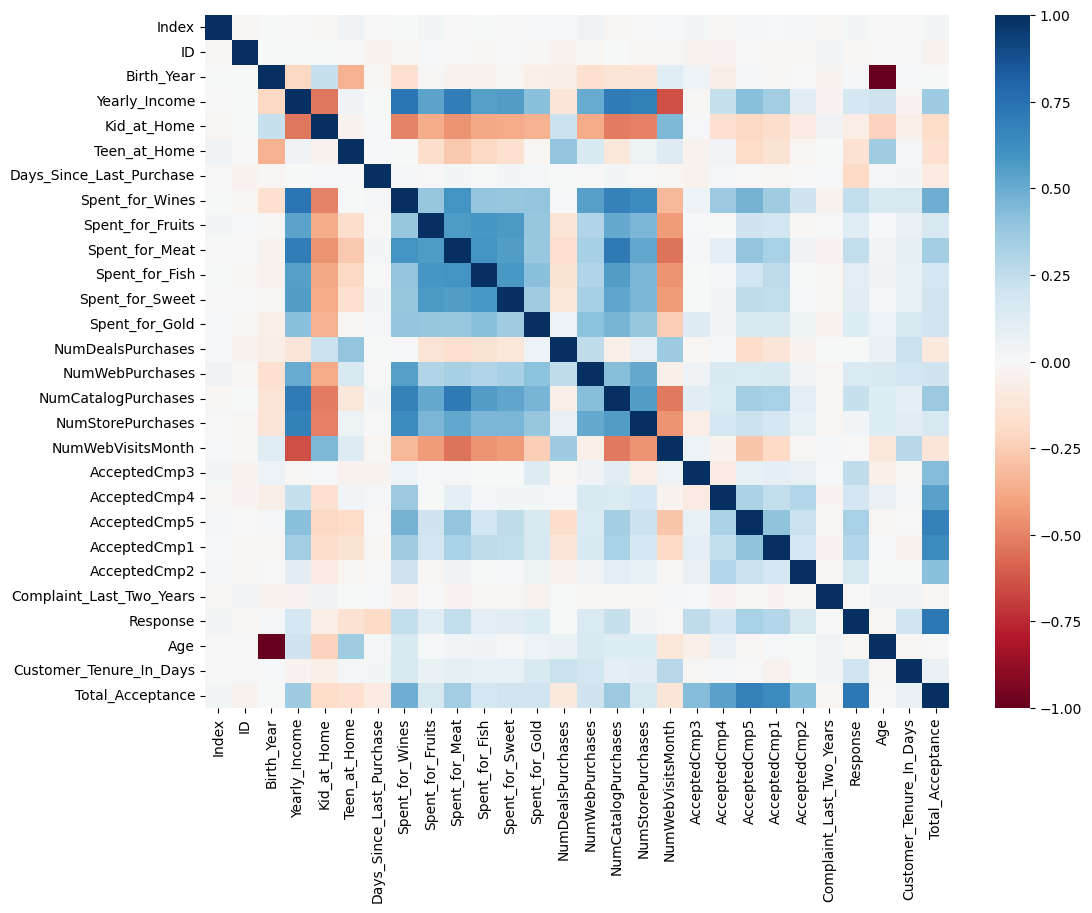

In [23]:
# Create a Correlation Map with Heatmap

corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,9))
sns.heatmap(corr, cmap='RdBu')

plt.show()

# a Correlation Map with Heatmap was created to understand the
# correlation between columns.

In [24]:
# After completing data-cleaning and descriptive analysis, our next goal was to
# implement a predictive analysis with using machine learning. We wanted to
# predict response of the customers to our last campaingn by providing customer information.
# Our inputs were customer demographics (education, marital status, age, income etc.)
# and their spending habits (purchases and spend amounts). Our output was response column.

In [25]:
# Create One Hot Vectors for Marital Status

one_hot_marital_status = pd.get_dummies(df['Marital_Status'])*1

print(one_hot_marital_status.shape)

# Add to data an index column

column_index_marital_status = range(0,2204)

one_hot_marital_status['Index'] = df['Index'].copy()

print(one_hot_marital_status.shape)

df = pd.merge(df, one_hot_marital_status, how = "inner")

df.shape

# One Hot vectors for marital status were created as part of data preperation before conducting prediction analysis.
# These vectors were created because marital status was categorical data.

(2204, 5)
(2204, 6)


(2204, 37)

In [26]:
# Create One Hot Vectors for Education

one_hot_education_status = pd.get_dummies(df['Education'])*1

print(one_hot_education_status.shape)
print(type(one_hot_education_status))

# Add to data an index column

# column_index_education_status = range(0,2204)

one_hot_education_status['Index'] = df['Index'].copy()
print(df.shape)
df = pd.merge(df, one_hot_education_status, how = "inner")
print(df.shape)

# One Hot vectors for education were created as part of data preperation before conducting prediction analysis.
# These vectors were created because education was categorical data.

(2204, 5)
<class 'pandas.core.frame.DataFrame'>
(2204, 37)
(2204, 42)


In [27]:
# Drop columns that won't be used in the prediction analysis with machine learning models

df = df.drop(['ID', 'Income_Intervals','Index', 'Birth_Year', 'Days_Since_Last_Purchase', 'Complaint_Last_Two_Years', 'Total_Acceptance', 'Customer_Enrollment_Date'], axis=1)

# The columns that won't be used in the prediction analysis with machine learning models were dropped.
# These columns were ID, Income_Intervals, Index, Birth_Year, Days_Since_Last_Purchase, Complaint_Last_Two_Years, Total_Acceptance and Customer_Enrollment_Date.

In [28]:
# Sum the spending on different products in one column

total_spent_columns = ['Spent_for_Wines', 'Spent_for_Fruits',
'Spent_for_Fish', "Spent_for_Meat", 'Spent_for_Sweet', 'Spent_for_Gold']

df["Total_Spent"] = df[total_spent_columns].sum(axis = 1)

# Spending on different products in one column were summed as part of data preperation before conducting prediction analysis.

In [29]:
# Drop the spent columns after calculating the total

df = df.drop(['Spent_for_Wines', 'Spent_for_Fruits',
'Spent_for_Fish', "Spent_for_Meat", 'Spent_for_Sweet', 'Spent_for_Gold'] , axis=1)

# Spent_for_Wines, Spent_for_Fruits, Spent_for_Fish, Spent_for_Meat, Spent_for_Sweet, Spent_for_Gold
# columns were dropped after calculating the total in a new column.

In [30]:
# Sum total purchase in a column (only purchases with similar correlations with the other columns are shown.)

total_purchase_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df["Total_Purchase"] = df[total_purchase_columns].sum(axis = 1)

# Purchases with similar correlations with the other columns were summed in a column.

In [31]:
# # Drop the purchase columns after calculating the total

df = df.drop(['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'] , axis =1)

In [32]:
# Drop the categorical data after creating one hot vectors.

df = df.drop(['Education', "Marital_Status"] , axis =1)

df.columns

# Education and Marital Status were dropped after creating one hot vectors.

Index(['Yearly_Income', 'Kid_at_Home', 'Teen_at_Home', 'NumDealsPurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age',
       'Customer_Tenure_In_Days', 'Divorced', 'Married', 'Single', 'Together',
       'Widow', '2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD',
       'Total_Spent', 'Total_Purchase'],
      dtype='object')

In [34]:
# Scale continous data with using sklearn

from sklearn.preprocessing import StandardScaler

scaled_columns = ['Age', 'Yearly_Income', 'Customer_Tenure_In_Days', 'Total_Spent','Total_Purchase','NumDealsPurchases','NumWebVisitsMonth']

scaler = StandardScaler()

scaler.fit(df[scaled_columns])

df[scaled_columns] = scaler.transform(df[scaled_columns])

# Columns containing continous data (Age, Yearly_Income, Customer_Tenure_In_Days, Total_Spent,
#Total_Purchase,NumDealsPurchases,NumWebVisitsMonth columns) were fit and tranformed by using sklearn and
# StandardScaler Class.

In [35]:
# Observe the mean and variance of the scaled columns

scaler.mean_, scaler.var_

# Mean and variance of the scaled columns were gathered.


(array([4.51324864e+01, 5.15964737e+04, 3.53674229e+02, 6.06044465e+02,
        1.25617060e+01, 2.31805808e+00, 5.34029038e+00]),
 array([1.38850868e+02, 4.28698804e+08, 4.10007060e+04, 3.61833972e+05,
        5.15501851e+01, 3.55718752e+00, 5.81160718e+00]))

In [36]:
# Get the head rows of new and updated columns.
df.head()

# The information from new and updated columns were gathered
# by inferred head rows from the dataframe.

,Yearly_Income,Kid_at_Home,Teen_at_Home,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,Single,Together,Widow,2n Cycle,Basic,Graduation,Master,PhD,Total_Spent,Total_Purchase
0,0.315939,0,0,0.361571,0.688468,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1.680650,1.314554
1,-0.253681,1,1,-0.168637,-0.141157,0,0,0,0,0,...,1,0,0,0,0,1,0,0,-0.962625,-1.192464
2,0.966746,0,0,-0.698845,-0.555969,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0.282540,1.035996
3,-1.205043,1,0,-0.168637,0.273656,0,0,0,0,0,...,0,1,0,0,0,1,0,0,-0.919402,-0.913906
4,0.323425,1,0,1.421988,-0.141157,0,0,0,0,0,...,0,0,0,0,0,0,0,1,-0.305962,0.200324


In [37]:
df.shape


(2204, 25)

In [45]:
# Implement several machine learning models after splitting the data to 5 as train and test data (4 train, 1 test data)

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
# from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

scaled_columns = ['Age', 'Yearly_Income', 'Customer_Tenure_In_Days', 'Total_Spent','Total_Purchase','NumDealsPurchases','NumWebVisitsMonth']

kf = KFold(n_splits=5)
print(kf.get_n_splits(df))

for i, (train_index, test_index) in enumerate(kf.split(df)):
    #print(f" Train:index={train_index}")
    #print(f" Test: index={test_index}")
    training_df = df.iloc[train_index]
    test_df = df.iloc[test_index]

    scaler = StandardScaler()
    scaler.fit(training_df[scaled_columns])

    training_df.loc[:, scaled_columns] = scaler.transform(training_df[scaled_columns])
    test_df.loc[:, scaled_columns] = scaler.transform(test_df[scaled_columns])


    y_train = training_df['Response']
    X_train = training_df.drop(["Response"], axis = 1)

    y_test = test_df['Response']
    X_test = test_df.drop(['Response'], axis=1)

    # clf = DecisionTreeClassifier(criterion='gini')
    # clf = RandomForestClassifier(n_estimators=16)
    # clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
    clf = XGBClassifier(n_estimators=80, max_depth=2, tree_method="hist")
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_auc = roc_auc_score(y_train, y_train_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)

    print(f"Trial {i}, Training accuracy: {train_accuracy}, Test accuracy: {test_accuracy}")
    print(f"Trial {i}, Training AUC: {train_auc}, Test AUC: {test_auc}")
    print("-"*12)

    # The dataframe was splitted into 5 parts for K-fold cross validation. 4 of them were identified
    # as training data and 1 was identified as test data. Within different machine learning models,
    # DecisionTreeClassifier,RandomForestClassifier, GradientBoostingClassifier and XGBClassifier were used and tested.
    # Since there was a data imbalance (only 15% of customers responded positively to the campaigns. So, in the Response
    # column,only %15 of the values are coded as 1 and the rest as 0.
    # It can be conluded that, XGBClassifier was the most suitable machine learning model for our data.
    # Yet, the prediction of the model was not very succesful and especially AUC was not very high, it is
    # still in the acceptable rate. As a future work, these models can be tested in a larger dataset,
    # since we only have 2204 rows and these models generally work better in the larger datasets.

5
Trial 0, Training accuracy: 0.9126488939307997, Test accuracy: 0.8843537414965986
Trial 0, Training AUC: 0.7505948082269027, Test AUC: 0.6714193270060397
------------
Trial 1, Training accuracy: 0.9154849688031764, Test accuracy: 0.8956916099773242
Trial 1, Training AUC: 0.7616984359726295, Test AUC: 0.7010690789473684
------------
Trial 2, Training accuracy: 0.9160521837776517, Test accuracy: 0.8639455782312925
Trial 2, Training AUC: 0.7394920964649832, Test AUC: 0.6689071038251365
------------
Trial 3, Training accuracy: 0.9149177538287011, Test accuracy: 0.8775510204081632
Trial 3, Training AUC: 0.7549186831625123, Test AUC: 0.6510408452925406
------------
Trial 4, Training accuracy: 0.9121315192743764, Test accuracy: 0.8613636363636363
Trial 4, Training AUC: 0.7315598687682107, Test AUC: 0.6557311347761364
------------
